In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pyARCiS

In [2]:
# initialize ARCiS from input file input.dat, store output in <output>
# the third argument with commandline options is optional
pyARCiS.pyinit('inputSimple.dat','output')

Output dir: output/
         ARtful modelling code for exoplanet Science - ARCiS
By using ARCiS you agree to the terms of use.
It basically means you offer us co-author rights on any paper
that uses results computed with ARCiS.
Let's get the show on the road!!
ARCiS version x�0!   `?m    j   ��7!    j                   h            �?m    j           �      @?m   x-1!   ���   ��7!   `?m   x-1!   P�   *��   �?m   D.1!    j   .1!   �?m   �/1!            �7!                            j                                                                                                @�U                                                                                                  �?m          @a `  �?m   �K 
input file: inputSimple.dat
Number of molecules:          4                
Number of clouds:             0                
Number of collision pairs:    2                
Number of observations:       0                
Planet

In [3]:
lam=np.empty([pyARCiS.pyex.nlam],dtype=float)
trans=np.empty([pyARCiS.pyex.nlam],dtype=float)
emis=np.empty([pyARCiS.pyex.nlam],dtype=float)
P=np.empty([pyARCiS.pyex.nr],dtype=float)
T=np.empty([pyARCiS.pyex.nr],dtype=float)
pyARCiS.pycomputemodel()
pyARCiS.pygettrans(lam,trans)
pyARCiS.pyverbose(False)

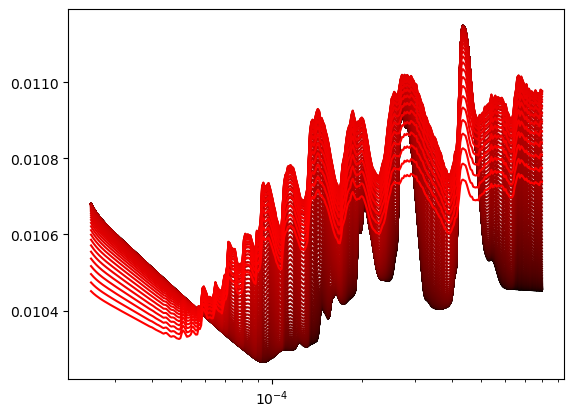

In [12]:
n=100
for i in range(0,n+1):
    H2O=10.0**(-9.0+8.0*float(i)/float(n))
# pysetvalue sets a keyword using a string and a float (key and value)
    pyARCiS.pysetvalue('H2O',H2O)
# pycomputemodel computes a model using the current setup
    pyARCiS.pycomputemodel()
    pyARCiS.pygettrans(lam,trans)
    plt.xscale('log')
    plt.plot(lam, trans, color=(i/n,0,0),zorder=200)

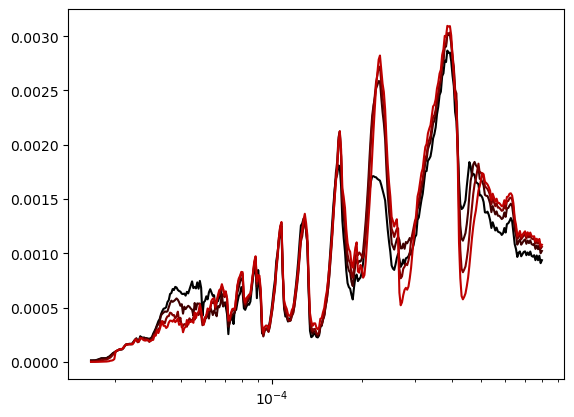

In [5]:
# pysetkeyword sets a keyword using two strings (key and value)
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# note that you always have to be carefull changing things after initialization. 
# For physical parameters (abundances, radius, mass, chemical parameters ...) it is always fine
# For retrieval parameters it is always fine
# For parameters defining the setup (number of layers, chemistry on/off, spectral resultion ...) 
#                                        it is usually NOT fine
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

pyARCiS.pysetkeyword('scattering','.true.')
pyARCiS.pysetkeyword('scattstar','.true.')

for i in range(0,4):
    Z=float(i)
    pyARCiS.pysetvalue('metallicity',Z)
    pyARCiS.pycomputemodel()
    pyARCiS.pygetemis(lam,emis,1)    
    plt.xscale('log')
    plt.plot(lam, emis, color=(i/4,0,0),zorder=200)


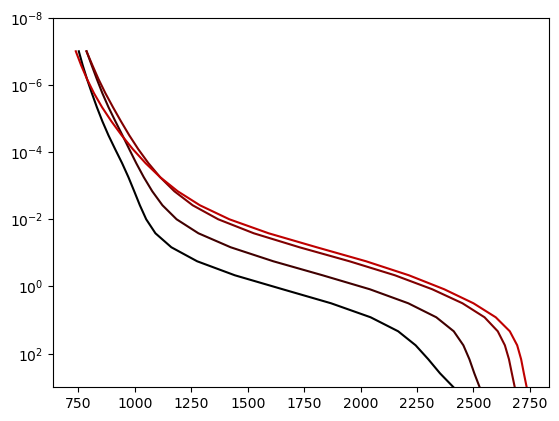

In [6]:
for i in range(0,4):
    Z=float(i)
    pyARCiS.pysetvalue('metallicity',Z)
    pyARCiS.pycomputemodel()
    pyARCiS.pygetpt(P,T)
    plt.plot(T,P, color=(i/4,0,0),zorder=200)
    plt.ylim(1000,1e-8)
    plt.yscale('log')